Exploratory Data Analysis on Haberman Survival Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# Loading haberman data set through haberman.csv file given in google classroom
haberman = pd.read_csv("haberman.csv")

In [2]:
#dimensions of our dataset
print (haberman.shape)

(306, 4)


In [4]:
#no of columns in our data set
print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [7]:
#we need to predict the status of the patient
#1 if patient survived 5 years or longer
#2 if patient died within 5 years
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

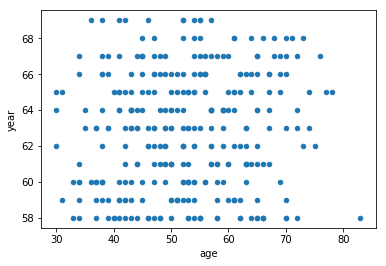

In [8]:
#2D Scatter Plot
haberman.plot(kind='scatter',x='age',y='year');
plt.show()

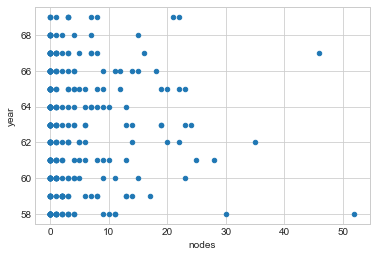

In [12]:
haberman.plot(kind='scatter',x='nodes',y='year');
plt.show()

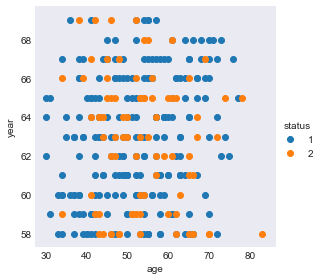

In [20]:
#changing the colours of two features
sns.set_style("dark");
sns.FacetGrid(haberman,hue="status",size=4) \
.map(plt.scatter,"age","year")\
.add_legend();
plt.show();

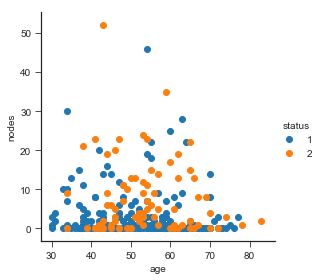

In [18]:
sns.set_style("ticks");
sns.FacetGrid(haberman,hue="status",size=4) \
.map(plt.scatter,"age","nodes")\
.add_legend();
plt.show();

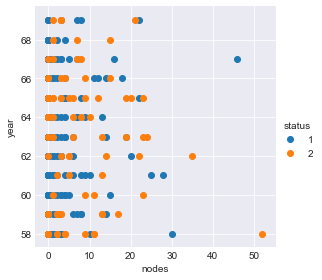

In [17]:
sns.set_style("darkgrid");
sns.FacetGrid(haberman,hue="status",size=4) \
.map(plt.scatter,"nodes","year")\
.add_legend();
plt.show();

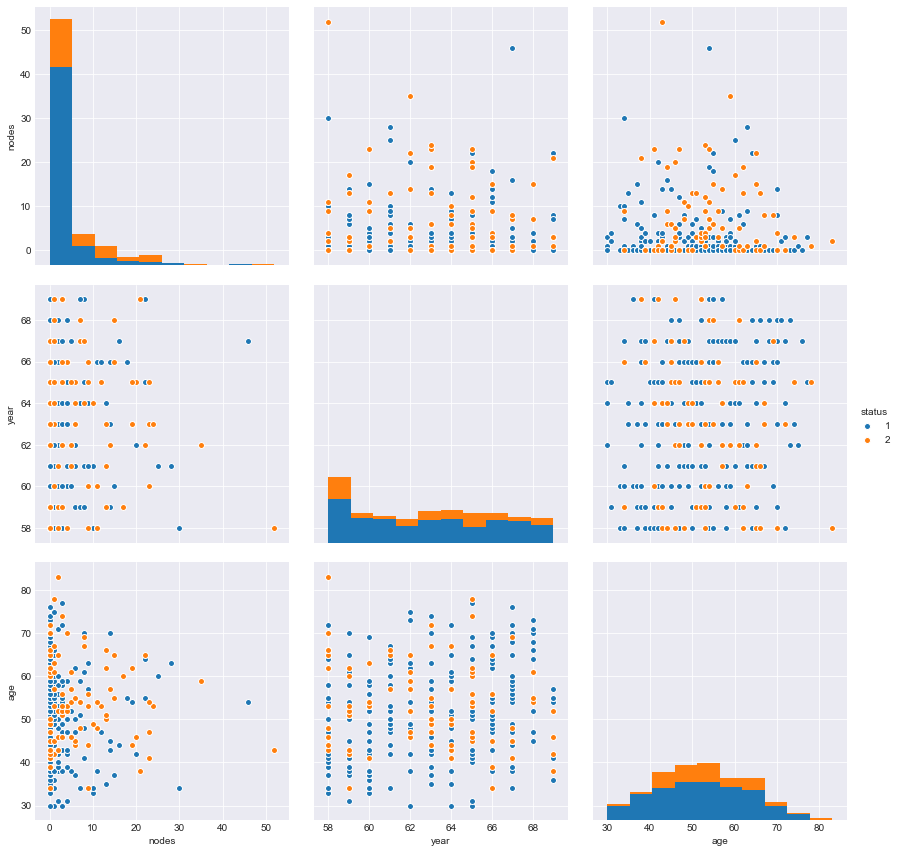

In [3]:
#pair plot
plt.close();
sns.set_style("darkgrid");
sns.pairplot(haberman,hue="status",vars=['nodes','year','age'],size=4);
plt.show();

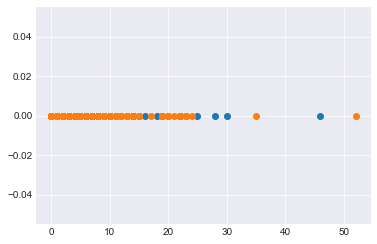

In [9]:
# 1D scatter plot
import numpy as np
haberman_status1 = haberman.loc[haberman["status"]==1];
haberman_status2 = haberman.loc[haberman["status"]==2];
plt.plot(haberman_status1["nodes"],np.zeros_like(haberman_status1['nodes']),'o')
plt.plot(haberman_status2["nodes"],np.zeros_like(haberman_status2['nodes']),'o')

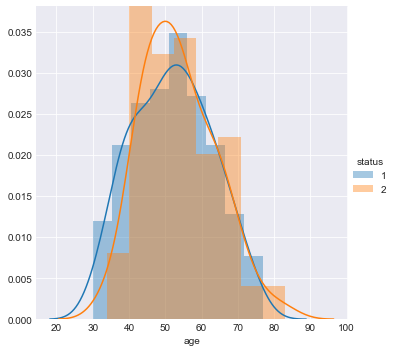

In [5]:
sns.FacetGrid(haberman,hue="status",size=5) \
    .map(sns.distplot,"age") \
    .add_legend();
plt.show();

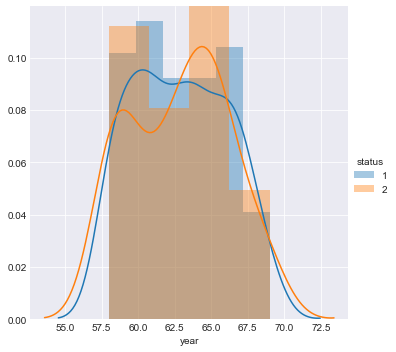

In [6]:
sns.FacetGrid(haberman,hue="status",size=5) \
    .map(sns.distplot,"year") \
    .add_legend();
plt.show();

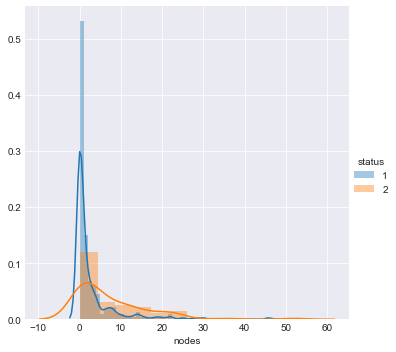

In [7]:
sns.FacetGrid(haberman,hue="status",size=5) \
    .map(sns.distplot,"nodes") \
    .add_legend();
plt.show();

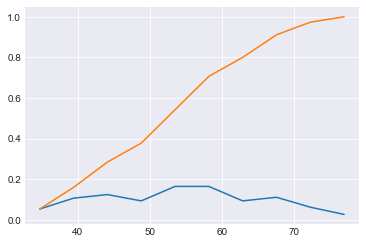

In [44]:
counts,bin_edges = np.histogram(haberman_status1['age'],bins=10,density=True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
#counts,bin_edges=np.histogram(haberman(haberman_status1['age'],bins=20,density=True)
#pdf = counts/(sum(counts))
#plt.plot(bin_edges[1:],pdf);
plt.show();

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.02469136 0.02469136 0.11111111 0.12345679 0.09876543 0.09876543
 0.14814815 0.0617284  0.07407407 0.04938272 0.09876543 0.03703704
 0.01234568 0.01234568 0.01234568 0.01234568]
[34.     37.0625 40.125  43.1875 46.25   49.3125 52.375  55.4375 58.5
 61.5625 64.625  67.6875 70.75   73.8125 76.875  79.9375 83.    ]


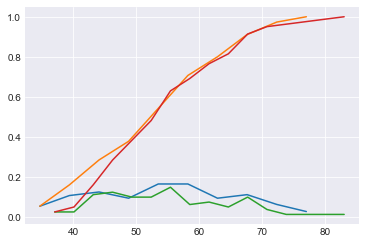

In [46]:
#plots of cdf's of different statuses in one graph
#status1
counts, bin_edges = np.histogram(haberman_status1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

#status2
counts, bin_edges = np.histogram(haberman_status2['age'], bins=16, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

In [47]:
#code for finding mean median and standard deviation
print("Mean")
print(np.mean(haberman_status1["age"]))
#mean with outlier
print(np.mean(np.append(haberman_status1["age"],50)));
print(np.mean(haberman_status2["age"]))
#now for standard deviation 
print("\nStandard deviation:");
print(np.std(haberman_status1["age"]))
print(np.std(haberman_status2["age"]))

Mean
52.01777777777778
52.008849557522126
53.67901234567901

Standard deviation:
10.98765547510051
10.10418219303131


In [48]:
print("Quantiles:")
print(np.percentile(haberman_status1["age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_status2["age"],np.arange(0, 100, 25)))
from statsmodels import robust
print ("\nMedian Absolute Deviation:")
print(robust.mad(haberman_status1["age"]))
print(robust.mad(haberman_status2["age"]))

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

Median Absolute Deviation:
13.343419966550417
11.860817748044816


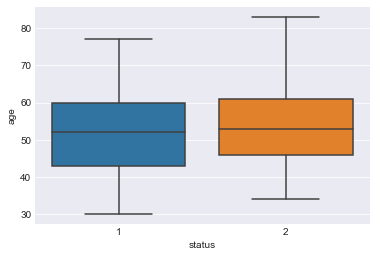

In [53]:
#code for box plot
sns.boxplot(x='status',y='age', data=haberman)
plt.show()

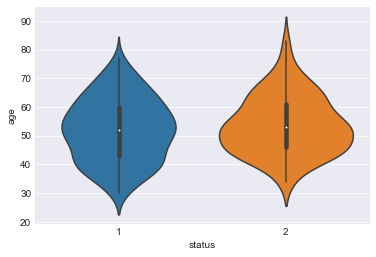

In [54]:
#code for violin plot
sns.violinplot(x="status", y=" ", data=haberman, size=8)
plt.show()

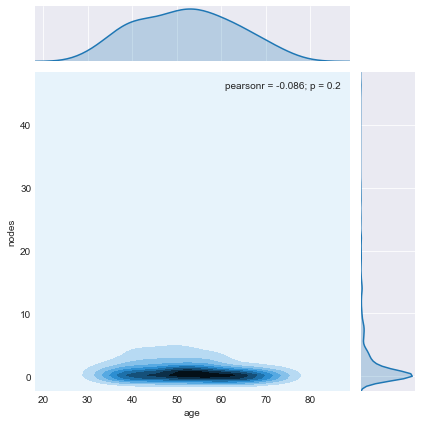

In [55]:
#2D dnsity plot contour plot
import seaborn as sns
sns.jointplot(x="age", y="nodes", data=haberman_status1, kind="kde");
plt.show();

In [ ]:
#we are going to load the dataset from the csv file given in the classroom then we will see the dimension and 
#the features present in the dataset and after that we start our exploratory data analysis by plotting different types 
#of plots
#2D scatter plot:
    #In 2D Scatter plot we will plot using different features like age,nodes year,age etc and find in
    # which plot we are getting the better results to classify easily 
    # out of the plots we have drawn in 2D scatter plot b/w age and year we will get somewhat better disperse of points
    #but that cannot be classified by a good decision boundary because the points are just dispersed but they are merged 
    # like they are not on one side in the form of a cluster so it is diifficult to classify them using a decision
    #boundary
#pair plot
    #in pair plots we will get all the combinations of the plots between our features at same place to easily 
    #differentiate b/w the best one.In 2D scatter plot we need to plot all the graphs differently but here we are all the 
    #possible graphs at one place.
    #in our pair plots after analysing all the plots we are unable to find the best graph or even a better graph which 
    #easily classifies b/w our status value although they are somewhat disperse but they are not in form to make a 
    #decision boundary.
#1D plot:
    #In 1D plot we are unable to analyse the data because all our points are overlapped and we also failed to 
    #find the better classification in this plot as well.
#Distribution plots
    #In the distribution plots we will analyse the distribution of our features from the curve drawn.
    #we can analyse many features like the mean variance thereby standard deviation and also we also get a hint about 
    #the data points for example in which position the points are densely distributed and where they are sparsely 
    #distributed,at which portion only the status1 points are present and at which portion both are getting overlapped etc.
    #in our graph we can see that the maximum of the portion we will find both of our points located.
    #we rarely see a portion of a graph that only contains one of our points.
    #we can also find the mean and variance of the points using this plot because the peak value is the median
    #and the spread of the graph is the  variance.
#pdf and cdf
    #in pdf and cdf we can draw lots of our conclusions like the points at which more points are loacted 
    #using cdf we can draw conclusions 95% people who died of cancer within 5 years are under the age of 70.
    #also 95% of people who survived for more than 5 years are also under the age of 70.
    #these kind of statistical facts we can draw fro our cdf and pdf
#box plot
    #in box plot we will get the statistics that are used get a idea about our data points
    # for status1 all values are approx 
    # maximum value = 78
    # upper quantile = 60 (25% of points are greater than 60)
    # median = 52 (50% of data is greater than this value)
    # lower quantile = 43 (25% of data is less than this value)
    #min value = 30
    #for status2 all values are approx
    # max value = 83 
    # upper quantile = 61 
    #median = 54
    #lower quantile = 46 
    #min value = 34
#violin plot 
    #in this plot we will have the box plot along with the distribution of points
    # it is like a combination of box plots with the distribution plots
#contour plot
    # it is also a density plot of 2D it gives the same conclusions as our density plots but visually rich
    
#univariate analysis : pdf , cdf , box plot , violin plot
# bivariate analysis : pair plot , scatter plot 
#multivariate analysis : 3D scatter plot